In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import scipy.stats as stats
import pandas as pd
import numpy as np
import json
import os
import sys

In [2]:
json_file_path = 'investment_mean_output.json'
with open(json_file_path, 'r') as f:
    investment_data = json.load(f)

investment_df_5 = pd.DataFrame(investment_data).T
investment_df_5.index = pd.to_datetime(investment_df_5.index)

In [3]:
investment_df_5['year'] = investment_df_5.index.year
investment_df_5['month'] = investment_df_5.index.month
investment_df_5['day'] = investment_df_5.index.day
investment_df_5['week'] = investment_df_5.index.isocalendar().week

In [4]:
investment_df_5.head()

,price_impact,demand_impact,supply_impact,year,month,day,week
2018-01-01,0.000000,2.666667,3.000000,2018,1,1,1
2018-01-08,1.500000,2.500000,3.500000,2018,1,8,2
2018-01-15,2.000000,3.333333,4.000000,2018,1,15,3
2018-01-22,1.333333,3.500000,3.666667,2018,1,22,4
2018-01-29,3.500000,3.000000,3.000000,2018,1,29,5


Text(0.5, 1.0, 'Histogram of supply impact')

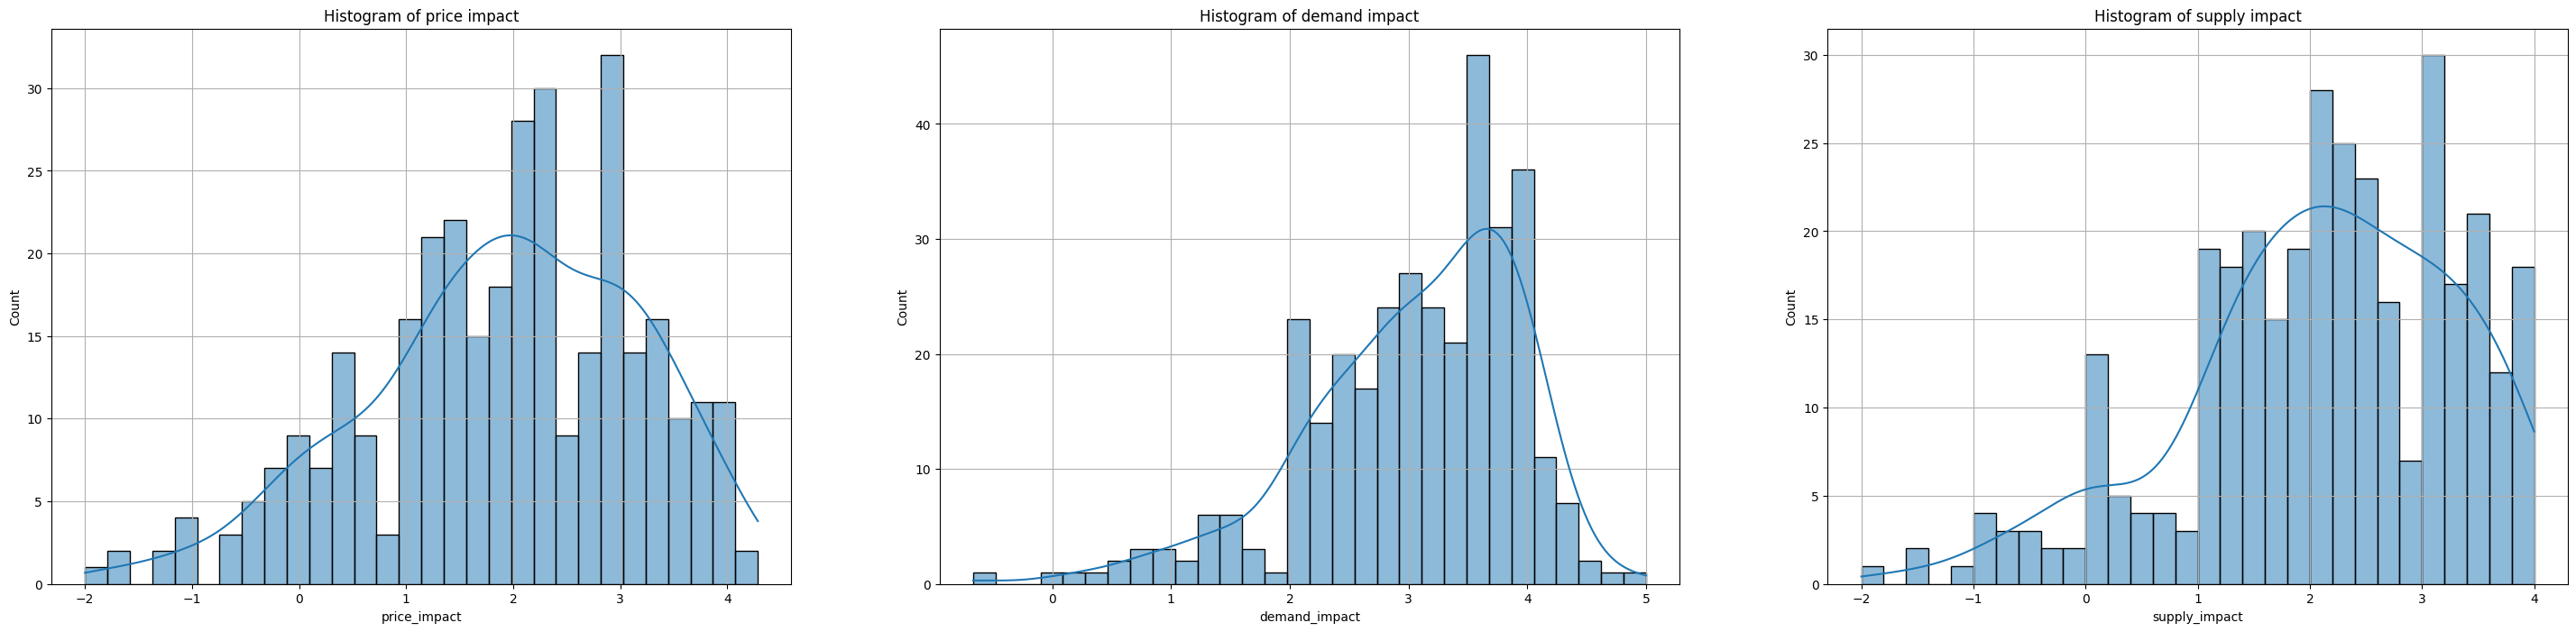

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(36, 8))
sns.histplot(data=investment_df_5, x='price_impact', kde=True, bins=30, ax=ax[0])
ax[0].grid()
ax[0].set_title('Histogram of price impact')

sns.histplot(data=investment_df_5, x='demand_impact', kde=True, bins=30, ax=ax[1])
ax[1].grid()
ax[1].set_title('Histogram of demand impact')

sns.histplot(data=investment_df_5, x='supply_impact', kde=True, bins=30, ax=ax[2])
ax[2].grid()
ax[2].set_title('Histogram of supply impact')

In [5]:
json_file_path = 'investment_mean_output_2scaled.json'
with open(json_file_path, 'r') as f:
    investment_data = json.load(f)

investment_df_2 = pd.DataFrame(investment_data).T
investment_df_2.index = pd.to_datetime(investment_df_2.index)

In [6]:
investment_df_2['year'] = investment_df_2.index.year
investment_df_2['month'] = investment_df_2.index.month
investment_df_2['day'] = investment_df_2.index.day
investment_df_2['week'] = investment_df_2.index.isocalendar().week

In [8]:
investment_df_2.head()

,price_impact,demand_impact,supply_impact,year,month,day,week
2018-01-01,0.333333,1.666667,1.333333,2018,1,1,1
2018-01-08,0.500000,1.250000,1.500000,2018,1,8,2
2018-01-15,1.000000,1.000000,1.000000,2018,1,15,3
2018-01-22,0.500000,1.333333,1.666667,2018,1,22,4
2018-01-29,1.200000,1.400000,1.600000,2018,1,29,5


Text(0.5, 1.0, 'Histogram of supply impact')

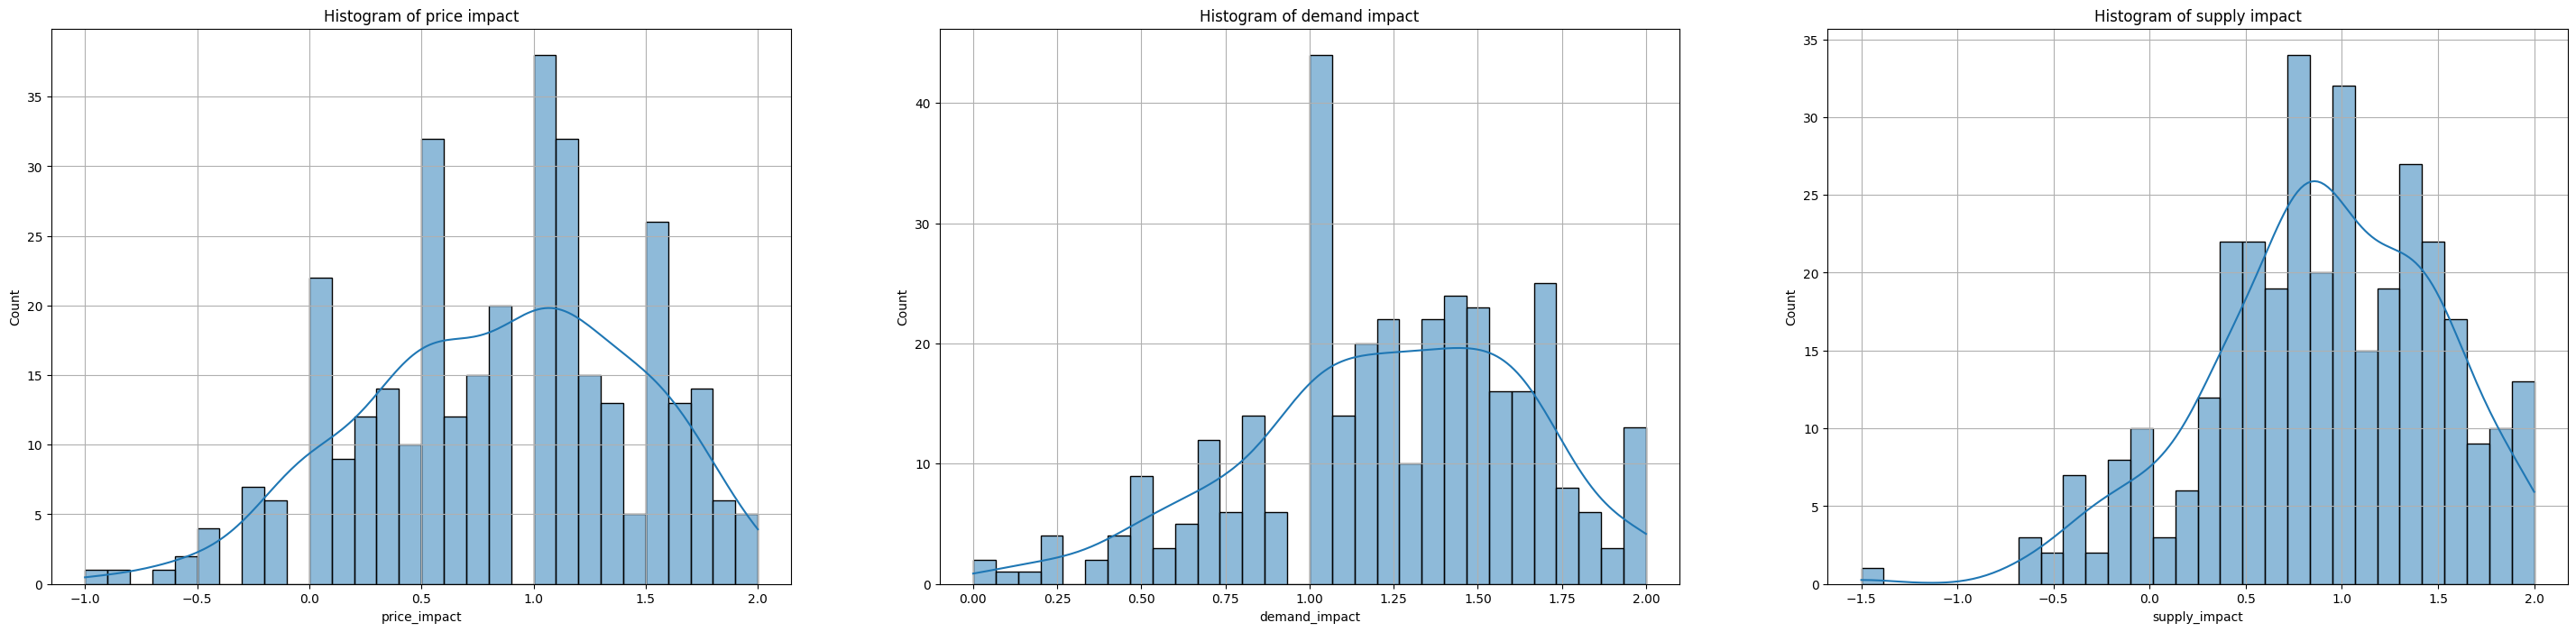

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(36, 8))
sns.histplot(data=investment_df_2, x='price_impact', kde=True, bins=30, ax=ax[0])
ax[0].grid()
ax[0].set_title('Histogram of price impact')

sns.histplot(data=investment_df_2, x='demand_impact', kde=True, bins=30, ax=ax[1])
ax[1].grid()
ax[1].set_title('Histogram of demand impact')

sns.histplot(data=investment_df_2, x='supply_impact', kde=True, bins=30, ax=ax[2])
ax[2].grid()
ax[2].set_title('Histogram of supply impact')

# Non-parametric statistical test

In [12]:
import pandas as pd
from scipy.stats import mannwhitneyu

# 예제 데이터프레임 생성 (여기서는 실제 데이터를 사용해야 합니다)
# investment_df_2 = pd.read_csv('path_to_investment_df_2.csv')
# investment_df_5 = pd.read_csv('path_to_investment_df_5.csv')

# 결과를 저장할 딕셔너리 초기화
results = {}

# 비교할 열 목록
columns_to_compare = ['price_impact', 'demand_impact', 'supply_impact']

# 각 열에 대해 Mann-Whitney U 검정 수행
for column in columns_to_compare:
    stat, p_value = mannwhitneyu(investment_df_2[column], investment_df_5[column])
    results[column] = {'statistic': stat, 'p_value': p_value}

# 결과 출력
for column, result in results.items():
    print(f"{column}: Mann-Whitney U statistic = {result['statistic']}, p-value = {round(result['p_value'], 4)}")


price_impact: Mann-Whitney U statistic = 24696.5, p-value = 0.0
demand_impact: Mann-Whitney U statistic = 5603.5, p-value = 0.0
supply_impact: Mann-Whitney U statistic = 19761.5, p-value = 0.0
